Model accuracy: 0.8980


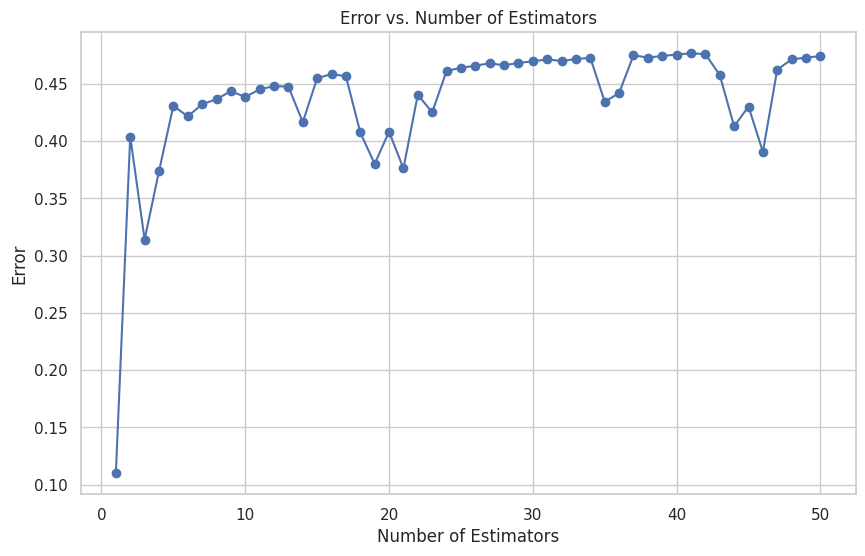

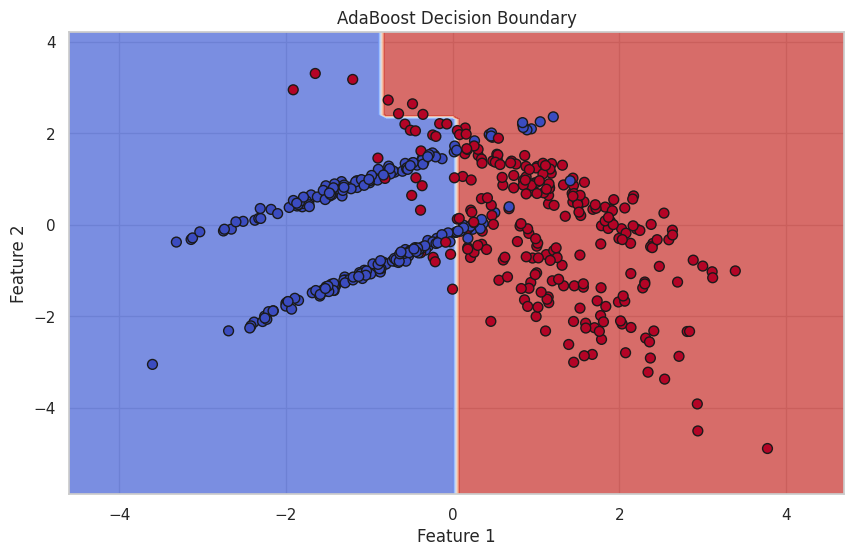

In [ ]:
#BOOSTING

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Set up plot style
sns.set(style="whitegrid")

class AdaBoost:
    def __init__(self, n_estimators=50):
        self.n_estimators = n_estimators
        self.alphas = []  # Weights of each weak classifier
        self.models = []  # Weak classifiers (e.g., decision stumps)
        self.errors = []  # List to store error for each estimator

    def fit(self, X, y):
        # Initialize weights for each data point
        n_samples, n_features = X.shape
        w = np.ones(n_samples) / n_samples  # Equal weights initially

        for estimator in range(self.n_estimators):
            # Train weak classifier (decision stump)
            model = DecisionTreeClassifier(max_depth=1)  # Decision stump
            model.fit(X, y, sample_weight=w)
            y_pred = model.predict(X)

            # Calculate error rate
            err = np.sum(w * (y_pred != y)) / np.sum(w)
            self.errors.append(err)

            # Compute alpha (weight for the classifier)
            alpha = 0.5 * np.log((1 - err) / err) if err < 1 else 0
            self.alphas.append(alpha)
            self.models.append(model)

            # Update weights for misclassified samples
            w = w * np.exp(-alpha * y * y_pred)  # Update weights based on classifier performance
            w = w / np.sum(w)  # Normalize the weights

    def predict(self, X):
        # Initialize the final prediction
        final_pred = np.zeros(X.shape[0])

        for model, alpha in zip(self.models, self.alphas):
            final_pred += alpha * model.predict(X)

        # Return the sign of the final prediction
        return np.sign(final_pred)

    def score(self, X, y):
        # Return accuracy of the model
        return accuracy_score(y, self.predict(X))

# Generate a synthetic binary classification dataset with 2 informative features
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)

# Convert labels to -1 and 1 for AdaBoost
y = 2 * y - 1

# Create and train AdaBoost model
adaboost = AdaBoost(n_estimators=50)
adaboost.fit(X, y)

# Evaluate the model
accuracy = adaboost.score(X, y)
print(f"Model accuracy: {accuracy:.4f}")

# Plot error over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, adaboost.n_estimators + 1), adaboost.errors, marker='o', linestyle='-', color='b')
plt.title('Error vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Error')
plt.grid(True)
plt.show()

# Plot decision boundary for final model
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = adaboost.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.75, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap='coolwarm')
plt.title('AdaBoost Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
#RANDOM FOREST
# STEP 1: Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from google.colab import files

# STEP 2: Upload your dataset
uploaded = files.upload()

# STEP 3: Load the dataset (assuming it's a CSV)
for filename in uploaded.keys():
    df = pd.read_csv(filename)
    print(f"Data loaded from: {filename}")
    display(df.head())  # Display first 5 rows of data

# STEP 4: Preprocessing
# Assume the last column is the target variable (label)
X = df.iloc[:, :-1]  # Features (all rows, all columns except last)
y = df.iloc[:, -1]   # Target (last column)

# STEP 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 6: Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest
rf_model.fit(X_train, y_train)

# STEP 7: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# STEP 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest Model: {accuracy * 100:.2f}%")

# STEP 9: Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Saving diabetes.csv to diabetes.csv
Data loaded from: diabetes.csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Accuracy of Random Forest Model: 72.08%
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



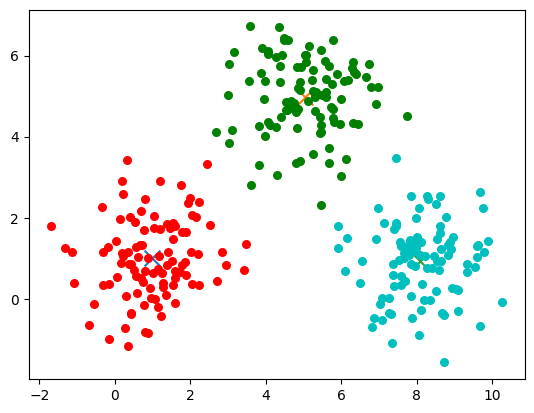

In [ ]:
#K-MEANS
class K_Means:

    def __init__(self, k=2, tolerance = 0.001, max_iter = 500):
        self.k = k
        self.max_iterations = max_iter
        self.tolerance = tolerance

    def euclidean_distance(self, point1, point2):
        #return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2 + (point1[2]-point2[2])**2)   #sqrt((x1-x2)^2 + (y1-y2)^2)
        return np.linalg.norm(point1-point2, axis=0)

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

    def fit(self, data):
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data[i]


        for i in range(self.max_iterations):
            self.classes = {}
            for j in range(self.k):
                self.classes[j] = []

            for point in data:
                distances = []
                for index in self.centroids:
                    distances.append(self.euclidean_distance(point,self.centroids[index]))
                cluster_index = distances.index(min(distances))
                self.classes[cluster_index].append(point)

            previous = dict(self.centroids)
            for cluster_index in self.classes:
                self.centroids[cluster_index] = np.average(self.classes[cluster_index], axis = 0)



            isOptimal = True

            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]
                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    isOptimal = False
            if isOptimal:
                break



def main():
    K=3
    center_1 = np.array([1,1])
    center_2 = np.array([5,5])
    center_3 = np.array([8,1])

    # Generate random data and center it to the three centers
    cluster_1 = np.random.randn(100, 2) + center_1
    cluster_2 = np.random.randn(100,2) + center_2
    cluster_3 = np.random.randn(100,2) + center_3

    data = np.concatenate((cluster_1, cluster_2, cluster_3), axis = 0)

    k_means = K_Means(K)
    k_means.fit(data)


    # Plotting starts here
    colors = 10*["r", "g", "c", "b", "k"]

    for centroid in k_means.centroids:
        plt.scatter(k_means.centroids[centroid][0], k_means.centroids[centroid][1], s = 130, marker = "x")

    for cluster_index in k_means.classes:
        color = colors[cluster_index]
        for features in k_means.classes[cluster_index]:
            plt.scatter(features[0], features[1], color = color,s = 30)

if __name__ == "__main__":
    main()

Saving Pizza.csv to Pizza.csv
✅ Uploaded: Pizza.csv


,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


📊 Numerical features found: ['id', 'mois', 'prot', 'fat', 'ash', 'sodium', 'carb', 'cal']


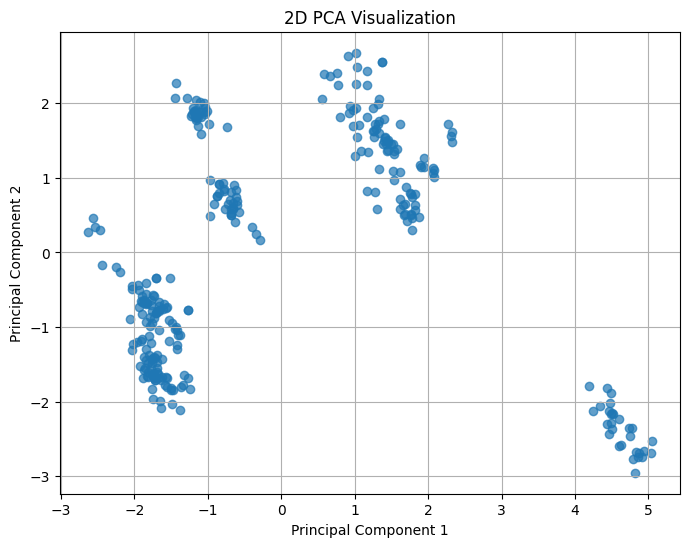

📈 Explained Variance Ratio: [0.52163044 0.28631263]


In [ ]:
#PCA

# STEP 1: Import packages
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files

# STEP 2: Upload the CSV file
uploaded = files.upload()

# STEP 3: Load the dataset
for filename in uploaded.keys():
    df = pd.read_csv(filename)
    print(f"✅ Uploaded: {filename}")
    display(df.head())

# STEP 4: Select numerical columns
numeric_df = df.select_dtypes(include=[np.number])
print("📊 Numerical features found:", list(numeric_df.columns))

# OPTIONAL: Manually select columns if needed
# selected_features = ['feature1', 'feature2', ...]
selected_features = numeric_df.columns  # use all numeric features for now

# STEP 5: Standardize data
X = numeric_df[selected_features].dropna()
X_scaled = StandardScaler().fit_transform(X)

# STEP 6: Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# STEP 7: Create DataFrame for components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# STEP 8: Visualize the first two principal components
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Visualization')
plt.grid(True)
plt.show()

# STEP 9: Explained variance ratio
print("📈 Explained Variance Ratio:", pca.explained_variance_ratio_)
